<a href="https://colab.research.google.com/github/Jeevan85/Ineuron/blob/main/ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train_full.shape,y_test.shape

((60000,), (10000,))

In [8]:
X_test[27]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 221,
        115,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 254,
        148,   0,   0,   0,   0,  22, 230, 134,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 168, 254,
        115,   0,   0,   0,   0,  24, 253, 184,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 234, 254,
         81,   0,   0,   0,   0,  91, 253, 184,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 221, 254, 160,
          0,   0,   0,   0,   0, 141, 254, 127,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 253, 253,  76,
          0,   0,   0,   0,   0, 207, 253,  93,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  15, 232, 253, 102,   0,
          0,   0,   0,   0,   0, 207, 253,  17,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 229, 253, 202,  19,   0,
          0,   0,   0,   0,  34, 240, 253,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   7, 170, 254, 254,  46,   0,   0,
          0,   0,   0,   0,  47, 254, 254,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  24, 253, 254, 253, 234, 163,  47,
         47,  26,   0,   0, 130, 253, 253,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 246, 254, 253, 253, 253, 254,
        253, 232, 174, 208, 232, 253, 177,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  84, 161, 211, 219, 219, 254,
        253, 253, 253, 254, 253, 244,  69,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  93,
        142, 142,  93, 170, 254, 230,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 153, 253, 213,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 170, 253, 137,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 220, 253, 137,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 255, 254,  80,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  93, 254, 253,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 254, 215,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [9]:
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [14]:
X_test =X_test/255.

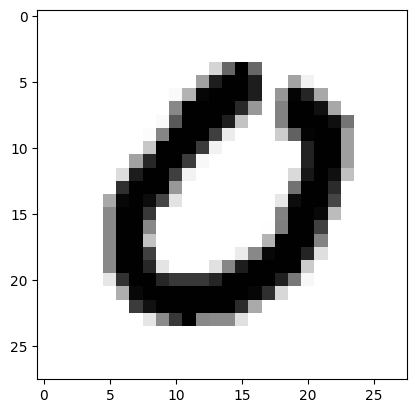

In [10]:
plt.imshow(X_train[7],cmap="binary")

<Axes: >

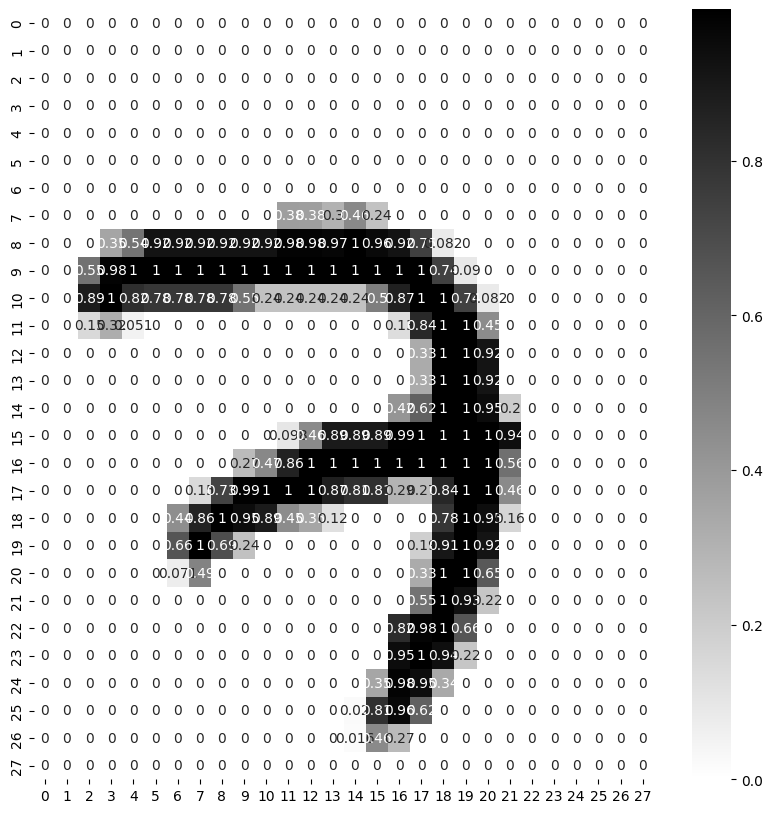

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[0],annot= True, cmap="binary")

In [12]:
LAYERS =[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLaayer")
]

In [13]:
model=tf.keras.models.Sequential(LAYERS)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLaayer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.get_weights()

[array([[-0.0404916 , -0.04174703,  0.05584955, ..., -0.03980816,
          0.03051021, -0.02086365],
        [ 0.06751904, -0.01898722,  0.0717428 , ...,  0.01201619,
         -0.02440637,  0.03561036],
        [-0.02499755,  0.03797399,  0.07332216, ..., -0.03162003,
          0.01099575, -0.03055054],
        ...,
        [ 0.05921151,  0.05345681, -0.00169668, ...,  0.00650573,
          0.02835396,  0.05558097],
        [-0.01587098, -0.04803212,  0.04180993, ...,  0.00394685,
         -0.03878082,  0.06607634],
        [-0.05822986, -0.02734125,  0.06410831, ..., -0.07203437,
         -0.00148867, -0.06830833]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [17]:
weights, baises = hidden1.get_weights()

In [18]:
weights, baises

(array([[-0.0404916 , -0.04174703,  0.05584955, ..., -0.03980816,
          0.03051021, -0.02086365],
        [ 0.06751904, -0.01898722,  0.0717428 , ...,  0.01201619,
         -0.02440637,  0.03561036],
        [-0.02499755,  0.03797399,  0.07332216, ..., -0.03162003,
          0.01099575, -0.03055054],
        ...,
        [ 0.05921151,  0.05345681, -0.00169668, ...,  0.00650573,
          0.02835396,  0.05558097],
        [-0.01587098, -0.04803212,  0.04180993, ...,  0.00394685,
         -0.03878082,  0.06607634],
        [-0.05822986, -0.02734125,  0.06410831, ..., -0.07203437,
         -0.00148867, -0.06830833]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [19]:
weights.shape, baises.shape

((784, 300), (300,))

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="SGD",metrics="accuracy")

In [22]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=32,callbacks=[early_stopping])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6362 - accuracy: 0.8358 - val_loss: 0.3161 - val_accuracy: 0.9130
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2904 - accuracy: 0.9173 - val_loss: 0.2475 - val_accuracy: 0.9310
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2368 - accuracy: 0.9328 - val_loss: 0.2096 - val_accuracy: 0.9426
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2019 - accuracy: 0.9417 - val_loss: 0.1871 - val_accuracy: 0.9472
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1757 - accuracy: 0.9496 - val_loss: 0.1623 - val_accuracy: 0.9564
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1554 - accuracy: 0.9551 - val_loss: 0.1511 - val_accuracy: 0.9578
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1393 - accuracy: 0.9597 - val_loss: 0.1351 - val_accuracy:

In [23]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.636216,0.835818,0.316090,0.9130
1,0.290387,0.917291,0.247506,0.9310
2,0.236800,0.932836,0.209572,0.9426
3,0.201897,0.941655,0.187132,0.9472
4,0.175746,0.949564,0.162315,0.9564
5,0.155403,0.955073,0.151146,0.9578
6,0.139337,0.959691,0.135065,0.9636
7,0.125856,0.963455,0.126618,0.9662
8,0.114446,0.967473,0.118818,0.9674
9,0.104771,0.970691,0.117220,0.9680


<Axes: >

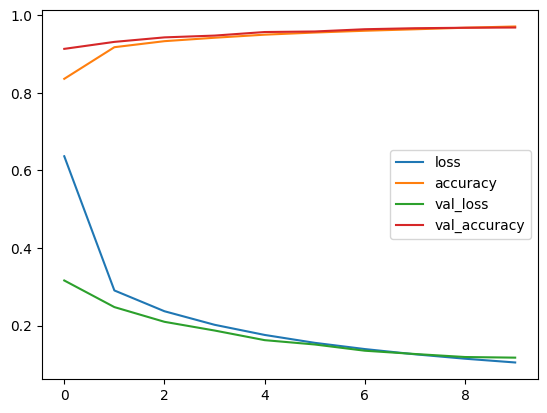

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 17.8413 - accuracy: 0.9605


[17.84127426147461, 0.9605000019073486]

In [26]:
X_test[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [29]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [31]:
y_prob = model.predict(X_test[:3])

1/1 [==============================] - 0s 20ms/step


In [32]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
ypred =np.argmax(y_prob,axis=-1)

In [34]:
ypred

array([7, 2, 1])

In [40]:
X_new=X_test[:3]

Predict value 7 and actual value 7


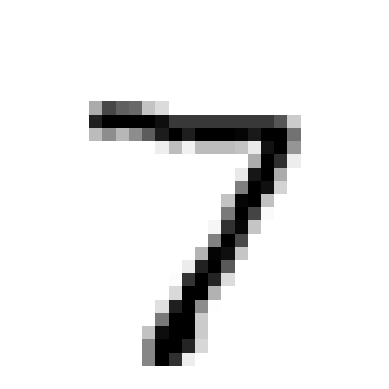

----------
Predict value 2 and actual value 2


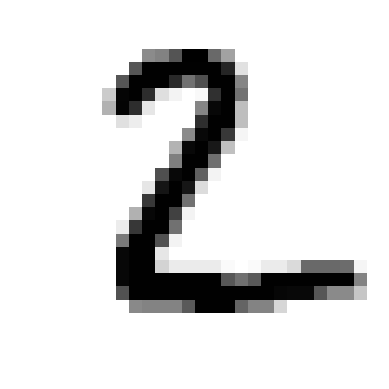

----------
Predict value 1 and actual value 1


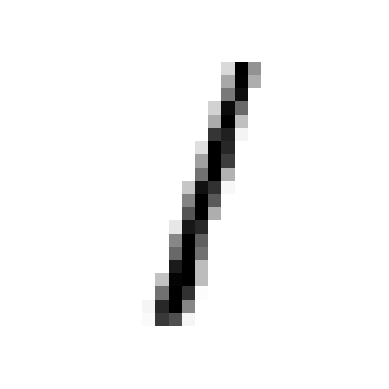

----------


In [42]:
for data,pred,act_data in zip(X_new,ypred,actual):
  plt.imshow(data,cmap="binary")
  print(f"Predict value {pred} and actual value {act_data}")
  plt.axis("off")
  plt.show()
  print("-"*10)